   # An Analysis of IMDbs Top 1000 Movies

### Data Scraping:
The scraping was done using the BeautifulSoup library. The notebook that contains the data scraping process can be found [here](https://github.com/oreoluwaolatunji/1000-Movies/blob/main/IMDb_Top_1000_Scraping.ipynb).

#### Importing the libraries:
The libraries were imported and the csv file read into the pandas dataframe.

In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import os
import matplotlib.pyplot as plt

movies = pd.read_csv('C:\\Users\\olatu\\Downloads\Datasets\\imdb_top_1000.csv')

In [21]:
movies.head(5) # Displayed the first five rows of the dataframe

,movie_name,release_year,runtime,genre,rating,director,cast_1,cast_2,cast_3,cast_4,votes,gross
0,(500) Days of Summer,(2009),95 min,"\nComedy, Drama, Romance",7.7,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,"540,709",$32.39M
1,12 Angry Men,(1957),96 min,"\nCrime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,"833,132",$4.36M
2,12 Years a Slave,(2013),134 min,"\nBiography, Drama, History",8.1,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,"725,381",$56.67M
3,1917,(2019),119 min,"\nAction, Drama, War",8.2,Sam Mendes,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,"642,696",$159.23M
4,2001: A Space Odyssey,(1968),149 min,"\nAdventure, Sci-Fi",8.3,Stanley Kubrick,Keir Dullea,Gary Lockwood,William Sylvester,Daniel Richter,"698,879",$56.95M


## Data Cleaning

After checking the first five rows, I took note of the columns that needed cleaning which were:
* release_year
* runtime
* genre
* votes
* gross

After dealing with the columns, I set the `movie_name` as the dataframe index.

The gross column also had `NaN` values so I dropped the rows that had those values and created a new dataframe called `movies_gross` for all analyses involving gross.


In [22]:
# Stripped the brackets off the years in the release_year column
movies['release_year'] = movies['release_year'].str.replace('\(|\)', '', regex = True)

# Stripped the 'min' string off the runtime in the runtime column
movies['runtime'] = movies['runtime'].str.strip('min')

# Stripped the '\n' string off the genre(s) in the genre column
movies['genre'] = movies['genre'].str.strip('\n')

# Removed the ',' by replacing it with an empty string
movies['votes'] = movies['votes'].str.replace(',', '')

# Stipped the '$' and 'M' strings off the gross values in the gross column
movies['gross'] = movies['gross'].str.strip('\$|\M')

# This function was created to removed numerical values with '#' in front of them that were not gross values and replaced with 'NaN'
def swap_value(value):
    if isinstance(value, str) and value.startswith('#'):
        return np.nan
    return value

# Applied the function created to remove the numerical values
movies['gross'] = movies['gross'].apply(swap_value)

# The gross column was converted to float from object and multiplied by 1,000,000 to give the gross values in full
movies['gross'] = movies['gross'].astype(float) * 1000000

# Stripped 'I ' string off years if was placed in front of in the release_year column
movies['release_year'] = movies['release_year'].str.strip('I ')

# Stripped 'II ' string off years if was placed in front of in the release_year column
movies['release_year'] = movies['release_year'].str.strip('II ')

# Stripped 'III ' string off years if was placed in front of in the release_year column
movies['release_year'] = movies['release_year'].str.strip('III ')

#Converted the release_year column to int from object
movies['release_year'] = movies['release_year'].astype(int)

#Converted the runtime column to int from object
movies['runtime'] = movies['runtime'].astype(int)

#Converted the votes column to int from object
movies['votes'] = movies['votes'].astype(int)

# Dataframe index set to movie_name
movies = movies.set_index('movie_name')

# NaN values in the gross column were dropped
movies_gross = movies.dropna()

In [23]:
movies.head(5) # Displayed the first five rows after the changes

,release_year,runtime,genre,rating,director,cast_1,cast_2,cast_3,cast_4,votes,gross
movie_name,,,,,,,,,,,
(500) Days of Summer,2009,95,"Comedy, Drama, Romance",7.7,Marc Webb,Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey Arend,Chloë Grace Moretz,540709,32390000.0
12 Angry Men,1957,96,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,833132,4360000.0
12 Years a Slave,2013,134,"Biography, Drama, History",8.1,Steve McQueen,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Brad Pitt,725381,56670000.0
1917,2019,119,"Action, Drama, War",8.2,Sam Mendes,Dean-Charles Chapman,George MacKay,Daniel Mays,Colin Firth,642696,159230000.0
2001: A Space Odyssey,1968,149,"Adventure, Sci-Fi",8.3,Stanley Kubrick,Keir Dullea,Gary Lockwood,William Sylvester,Daniel Richter,698879,56950000.0


## Analysis

With the data cleaned, I could begin my analysis. I worked with the following questions:
+ What actor featured in the most number of movies?
+ What actor had the most gross based on number of movies featured in?
+ What actor had the biggest average gross based on number of movies featured in?
+ What actor had the biggest average runtime for movies?
+ What actor had the best average rating?
+ What director directed the most number of movies?
+ What director had the most gross based on number of movies directed?
+ What director had the biggest average gross based on number of movies directed?
+ What director had the biggest average runtime for movies?
+ What director had the best average rating?
+ What genre/genres had the most number of movies?
+ What genre/genres had the most gross based on number of movies?
+ What genre/genres had the best average gross based on number of movies?
+ What genre/genres had the biggest average runtime for movies?
+ What genre had the best average rating?

I divided my codes into the following categories:
* Directors
* Genre
* Actors

#### Directors:

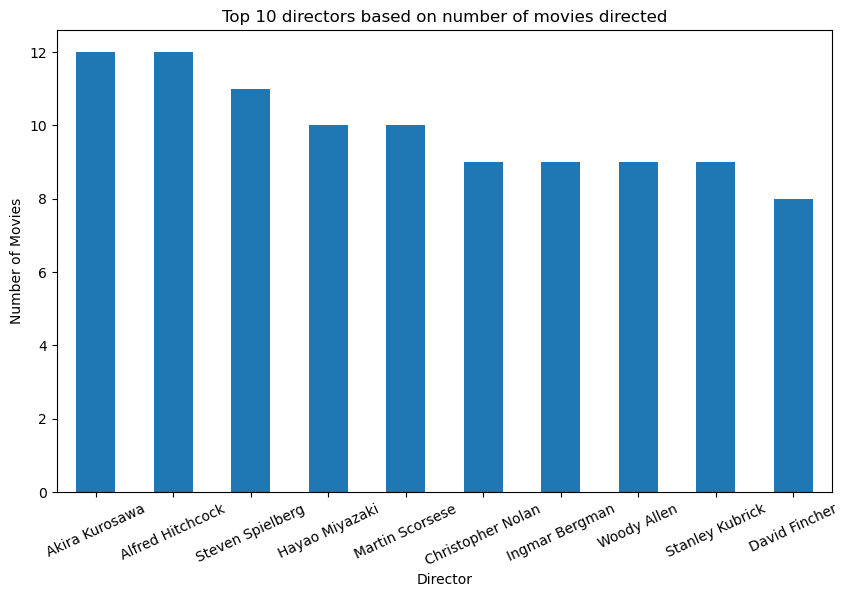

In [24]:
# Plotting a bar graph to display directors with the most number of movies (Highest 10 selected)
directors_t10 = movies.groupby('director')['director'].count().sort_values(ascending = False).head(10)
plt.figure(figsize = (10,6))
directors_t10.plot(kind = 'bar')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 10 directors based on number of movies directed')
plt.xticks(rotation = 25)
plt.show()

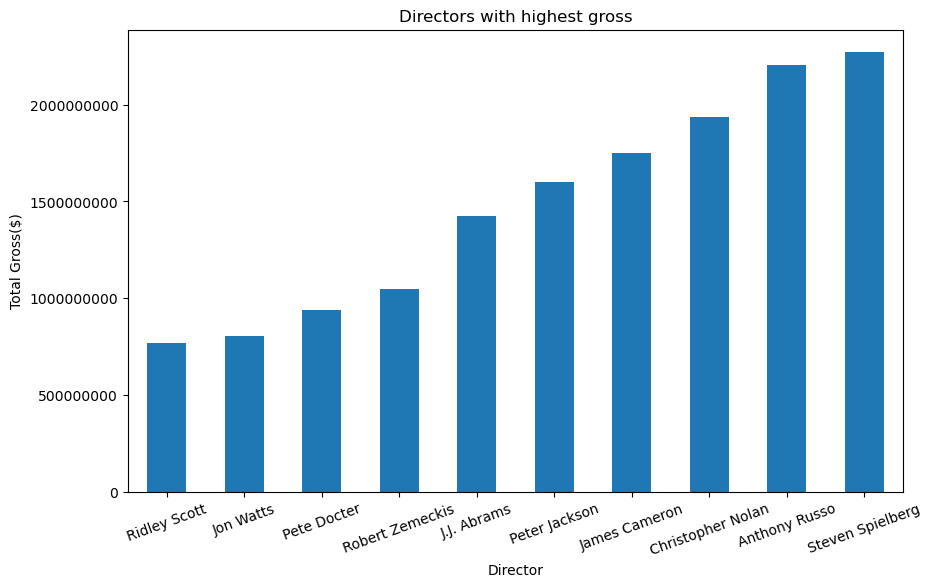

In [25]:
# Plotting a bar graph to display directors with the highest gross based on movies directed(Highest 10 selected)
director_gross = movies_gross.groupby('director')['gross'].sum().sort_values().tail(10)
plt.figure(figsize = (10,6))
director_gross.plot(kind = 'bar')
plt.xlabel('Director')
plt.ylabel('Total Gross($)')
plt.title('Directors with highest gross')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 20)
plt.show()

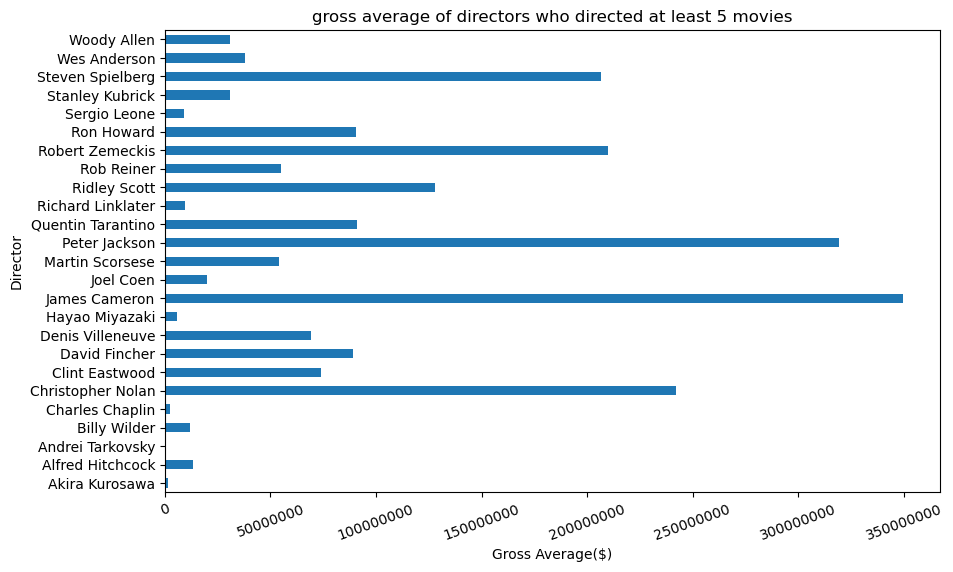

In [26]:
# Plotting a bar graph to display the average gross of directors with at least 5 movies directed
directors = movies_gross['director'].value_counts()[movies_gross['director'].value_counts() > 4].index.tolist()
directors = movies_gross[movies_gross['director'].isin(directors)]
directors_average = directors.groupby('director')['gross'].mean()
plt.figure(figsize = (10,6))
directors_average.plot(kind = 'barh')
plt.ylabel('Director')
plt.xlabel('Gross Average($)')
plt.title('gross average of directors who directed at least 5 movies')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(rotation = 20)
plt.show()

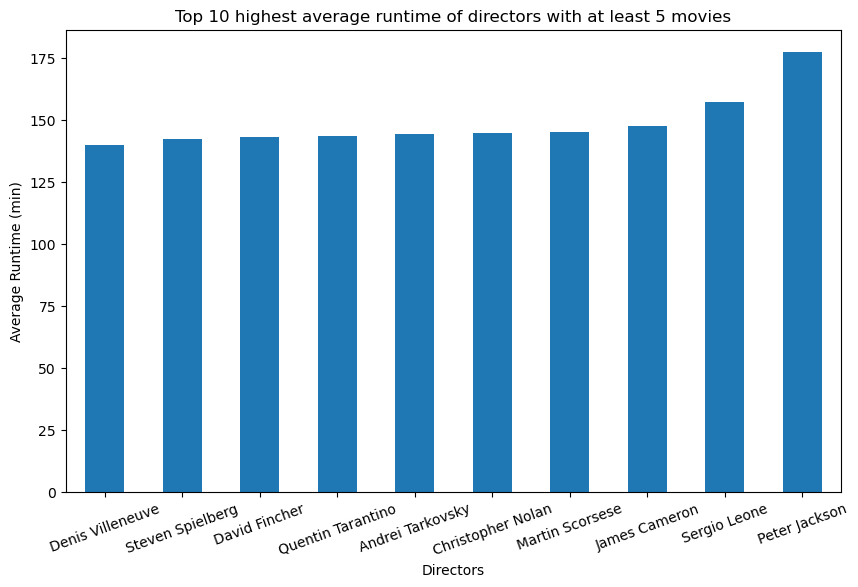

In [27]:
# Plotting a bar graph to display the highest average runtime of directors with at least 5 movies directed (Highest 10 selected)
dir_run = movies.groupby('director').size()
dir_run = dir_run[dir_run > 4].index.tolist()
dir_run_avg = movies[movies['director'].isin(dir_run)].groupby('director')['runtime'].mean().sort_values().tail(10)
plt.figure(figsize = (10,6))
dir_run_avg.plot(kind = 'bar')
plt.xlabel('Directors')
plt.ylabel('Average Runtime (min)')
plt.title('Top 10 highest average runtime of directors with at least 5 movies')
plt.xticks(rotation = 20)
plt.show()

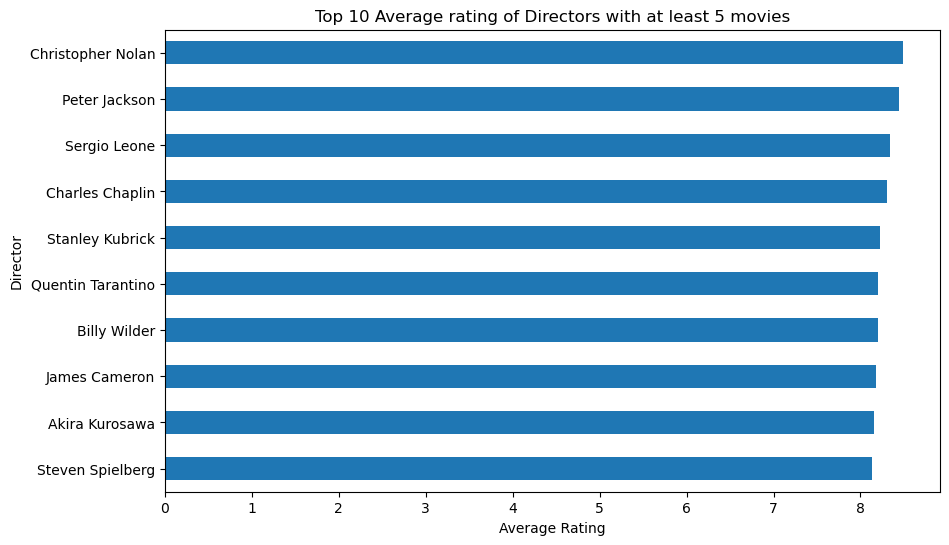

In [28]:
# Plotting a bar graph to display the highest average rating of directors with at least 5 movies directed (Highest 10 selected)
dir_rat = movies.groupby('director').size()[movies.groupby('director').size() >= 5].index.tolist()
dir_rat = movies[movies['director'].isin(dir_rat)]
dir_rat = dir_rat.groupby('director')['rating'].mean().sort_values().tail(10)
plt.figure(figsize = (10,6))
dir_rat.plot(kind = 'barh')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.title('Top 10 Average rating of Directors with at least 5 movies')
plt.show()

#### Genre:

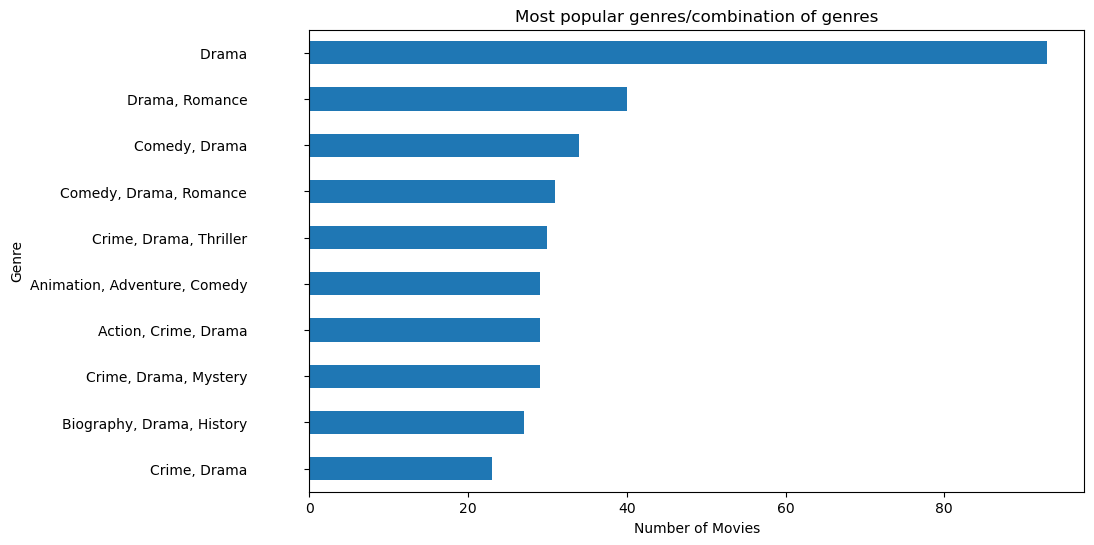

In [29]:
# Plotting a bar graph to display genre/genres with the most number of movies (Highest 10 selected)
genre10 = movies.groupby('genre')['genre'].count().sort_values().tail(10)
plt.figure(figsize = (10,6))
genre10.plot(kind = 'barh')
plt.ylabel('Genre')
plt.xlabel('Number of Movies')
plt.title('Most popular genres/combination of genres')
plt.show()

<Figure size 1000x600 with 0 Axes>

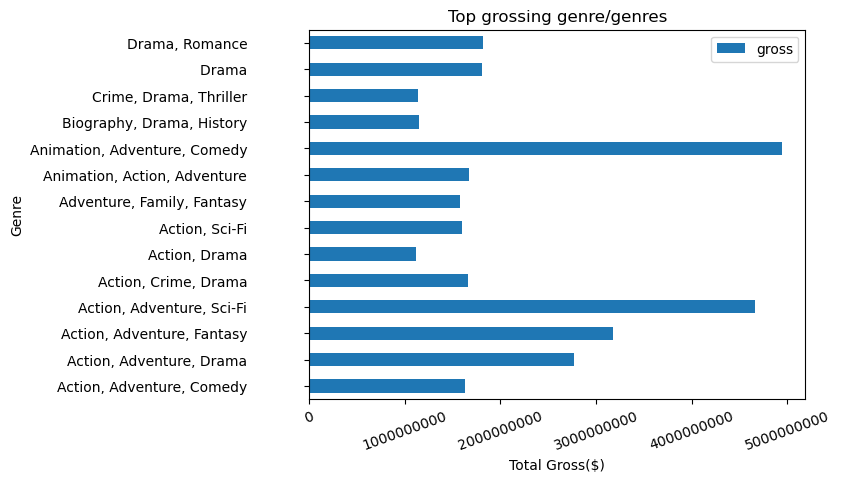

In [30]:
# Plotting a bar graph to display genre/genres with the highest gross(Over $1 billion selected)
highest_gross = movies_gross.groupby('genre')['gross'].sum()
highest_gross = highest_gross[highest_gross > 1000000000].to_frame()
plt.figure(figsize = (10,6))
highest_gross.plot(kind = 'barh')
plt.ylabel('Genre')
plt.xlabel('Total Gross($)')
plt.title('Top grossing genre/genres')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(rotation = 20)
plt.show()

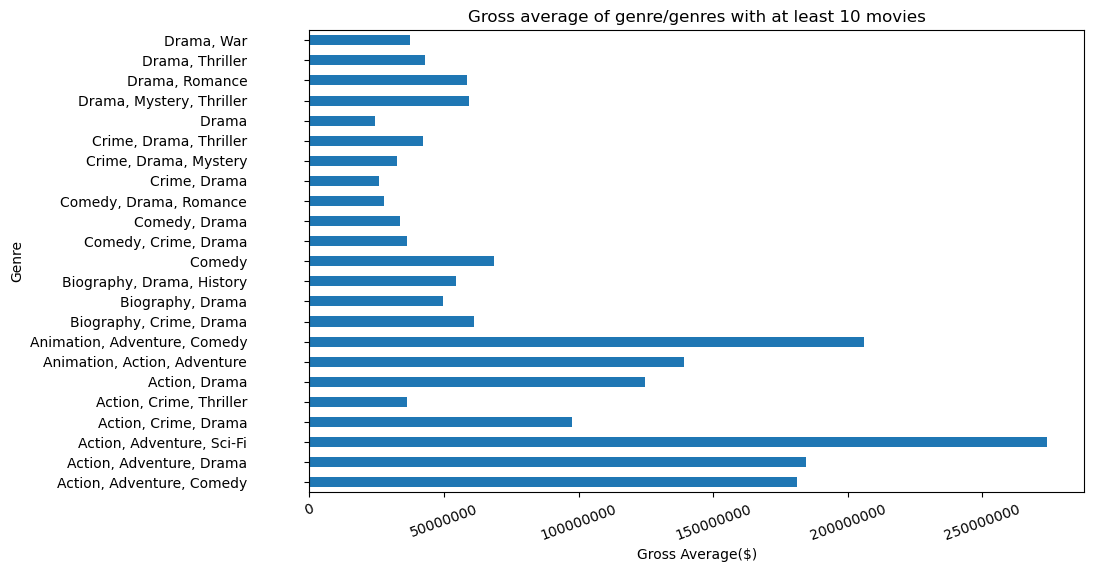

In [31]:
# Plotting a bar graph to display the average gross of genre/genres (Minimum of 10 movies)
movies_double_digits = movies_gross['genre'].value_counts()[movies['genre'].value_counts() >= 10].index.tolist()
movies_double_digits = movies_gross[movies_gross['genre'].isin(movies_double_digits)]
average_gross = movies_double_digits.groupby('genre')['gross'].mean()
plt.figure(figsize = (10,6))
average_gross.plot(kind = 'barh')
plt.ylabel('Genre')
plt.xlabel('Gross Average($)')
plt.title('Gross average of genre/genres with at least 10 movies')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(rotation = 20)
plt.show()

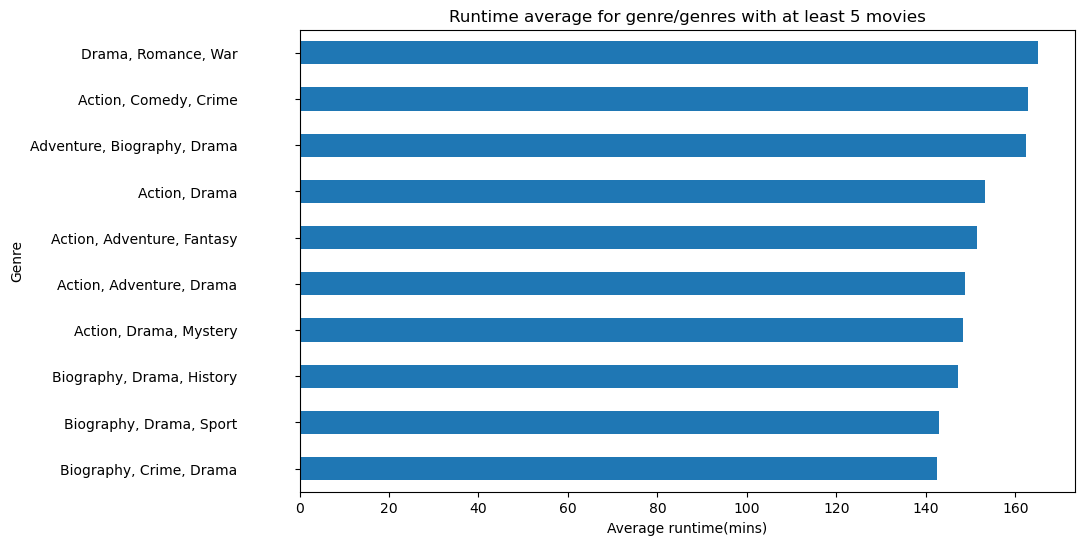

In [32]:
# Plotting a bar graph to display the average runtime of genre/genres (Minimum of 5 movies || Highest 10 selected)
genre_5 = movies['genre'].value_counts()[movies['genre'].value_counts() >= 5].index.tolist()
genre_5 = movies[movies['genre'].isin(genre_5)]
genre_5_average = genre_5.groupby('genre')['runtime'].mean().sort_values().tail(10)
plt.figure(figsize = (10,6))
genre_5_average.plot(kind = 'barh')
plt.ylabel('Genre')
plt.xlabel('Average runtime(mins)')
plt.title('Runtime average for genre/genres with at least 5 movies')
plt.xticks(rotation=0)
plt.show()

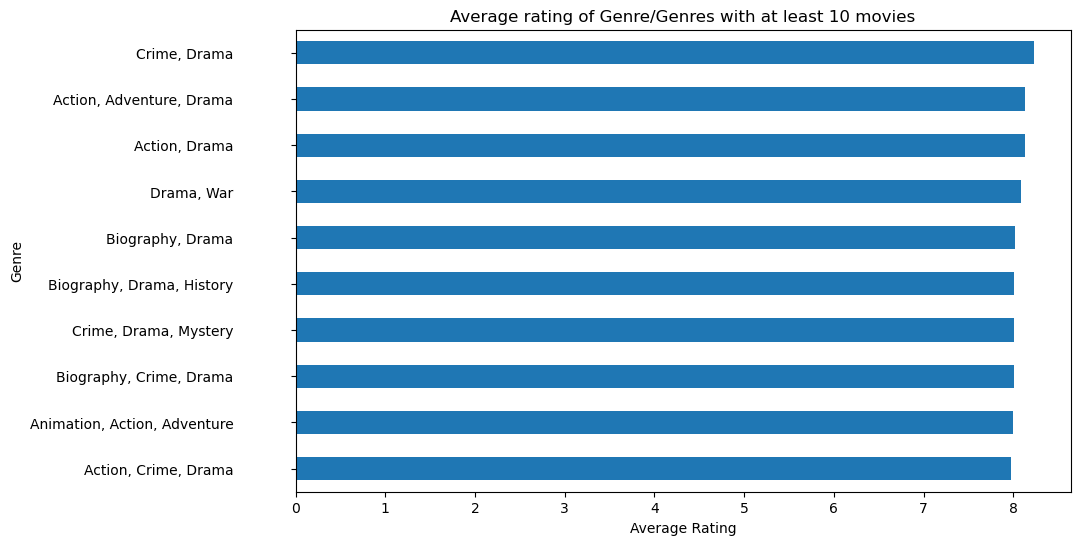

In [33]:
# Plotting a bar graph to display the average rating of genre/genres (Minimum of 5 movies || Highest 10 selected)
mov_rat = movies.groupby('genre').size()[movies.groupby('genre').size() >= 10].index.tolist()
mov_rat = movies[movies['genre'].isin(mov_rat)]
mov_rat = mov_rat.groupby('genre')['rating'].mean().sort_values().tail(10)
plt.figure(figsize = (10,6))
mov_rat.plot(kind = 'barh')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average rating of Genre/Genres with at least 10 movies')
plt.show()

#### Actors:

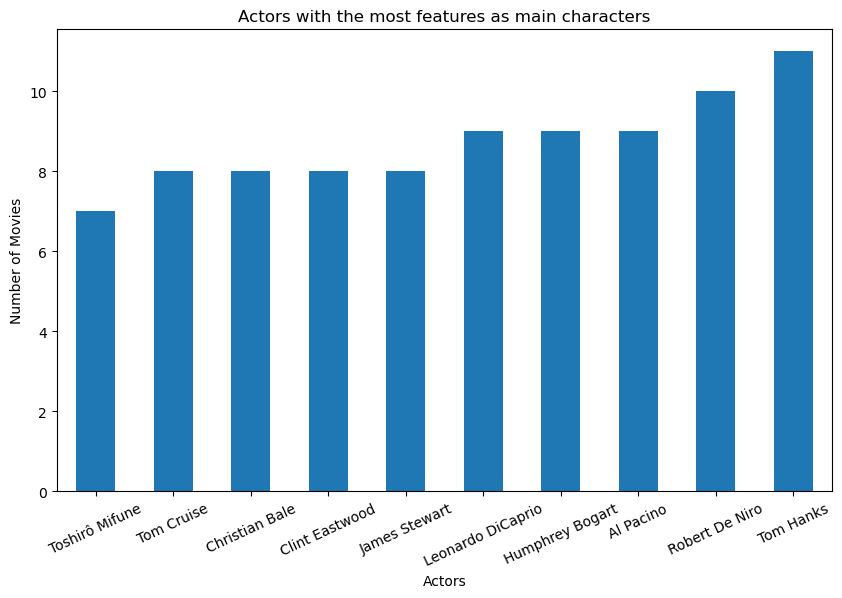

In [34]:
# Plotting a bar graph to display actors with the most number of movies featured in (Highest 10 selected)
actors10 = movies.groupby('cast_1')['cast_1'].count().sort_values().tail(10)
plt.figure(figsize = (10,6))
actors10.plot(kind = 'bar')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Actors with the most features as main characters')
plt.xticks(rotation = 25)
plt.show()

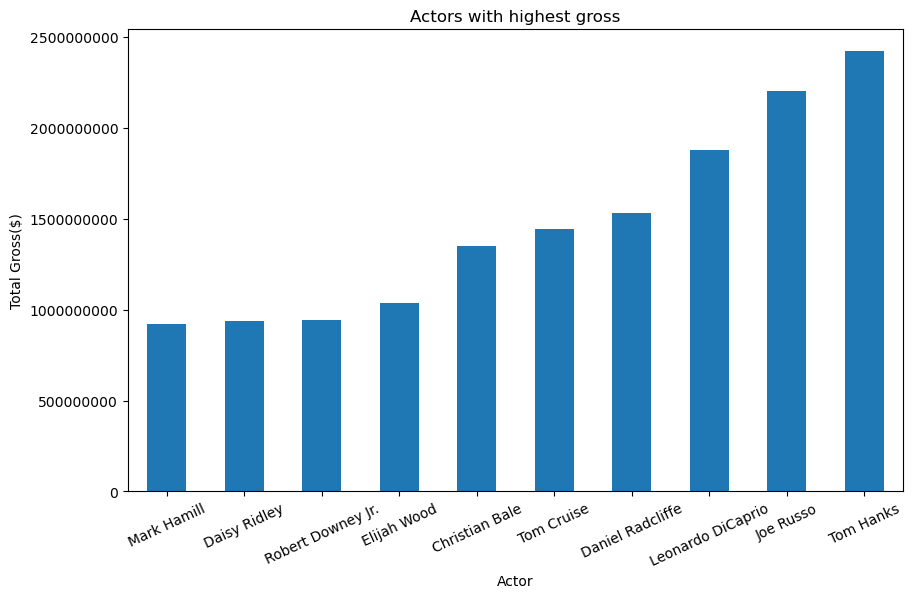

In [35]:
# Plotting a bar graph to display actors with the highest gross based on movies featured in (Highest 10 selected)
actor_gross = movies_gross.groupby('cast_1')['gross'].sum().sort_values().tail(10)
plt.figure(figsize = (10,6))
actor_gross.plot(kind = 'bar')
plt.xlabel('Actor')
plt.ylabel('Total Gross($)')
plt.title('Actors with highest gross')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = 25)
plt.show()

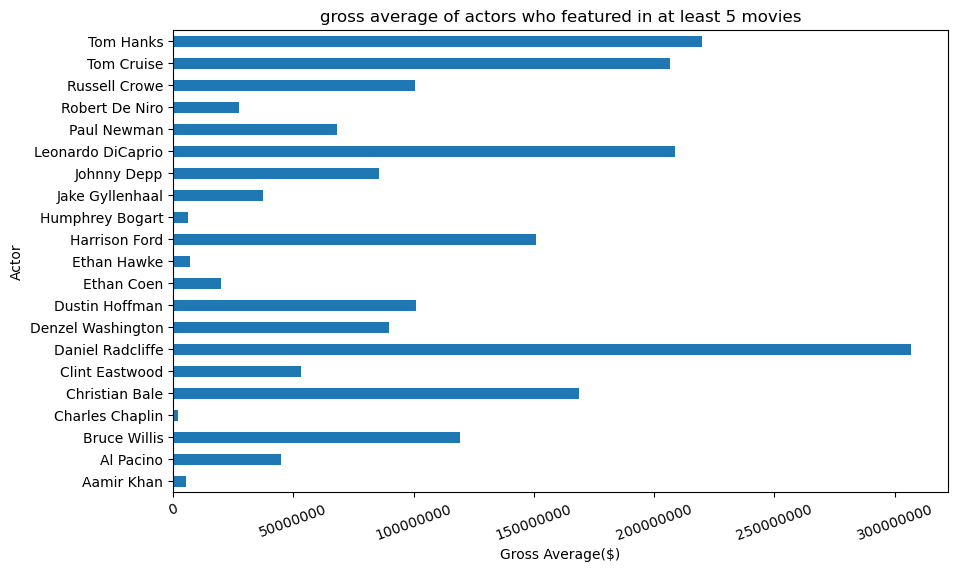

In [36]:
# Plotting a bar graph to display the average gross of actors based on movies featured in (Minimum of 5 movies)
stars = movies_gross['cast_1'].value_counts()[movies_gross['cast_1'].value_counts() > 4].index.tolist()
stars = movies_gross[movies_gross['cast_1'].isin(stars)]
stars_average = stars.groupby('cast_1')['gross'].mean()
plt.figure(figsize = (10,6))
stars_average.plot(kind = 'barh')
plt.ylabel('Actor')
plt.xlabel('Gross Average($)')
plt.title('gross average of actors who featured in at least 5 movies')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.xticks(rotation = 20)
plt.show()

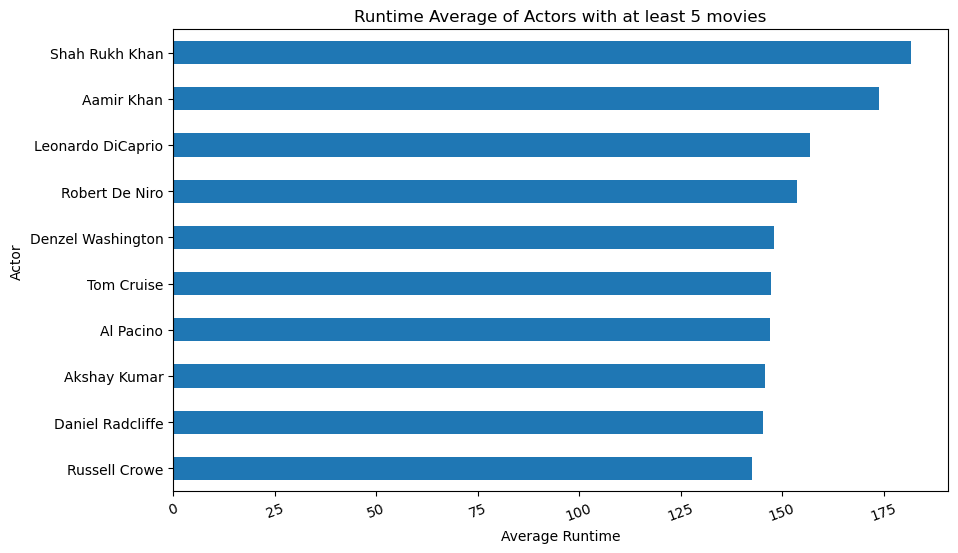

In [37]:
# Plotting a bar graph to display average runtime of actors based on movies featured in (Minimum of 5 movies || Highest 10 selected)
actor_run = movies.groupby('cast_1').size()
actor_run = actor_run[actor_run >= 5].index.tolist()
actor_run_avg = movies[movies['cast_1'].isin(actor_run)]
actor_run_avg = actor_run_avg.groupby('cast_1')['runtime'].mean().sort_values().tail(10)
plt.figure(figsize =(10,6))
actor_run_avg.plot(kind = 'barh')
plt.ylabel('Actor')
plt.xlabel('Average Runtime')
plt.title('Runtime Average of Actors with at least 5 movies')
plt.xticks(rotation = 20)
plt.show()

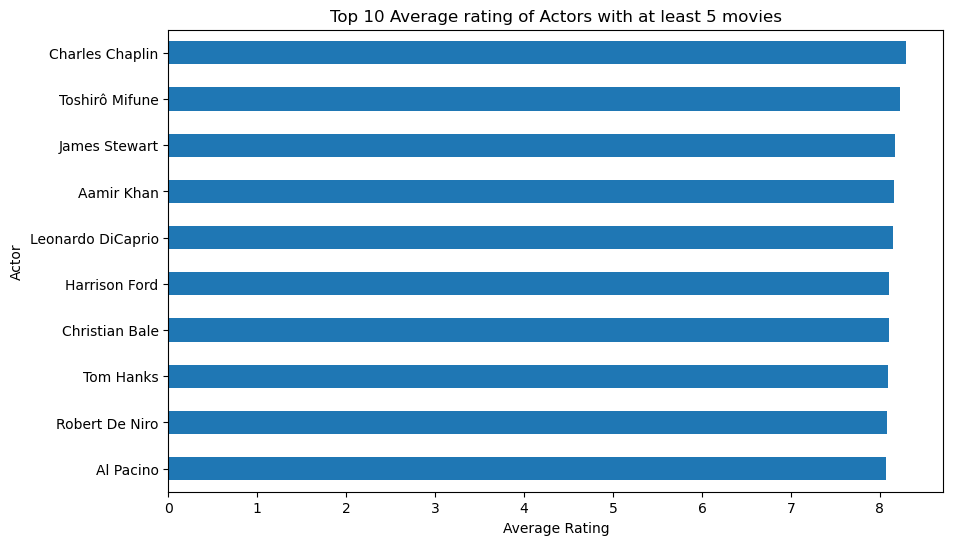

In [38]:
# Plotting a bar graph to display the average rating of actors based on movies featured in (Minimum of 5 movies || Highest 10 selected)
actor_rat = movies.groupby('cast_1').size()[movies.groupby('cast_1').size() >= 5].index.tolist()
actor_rat = movies[movies['cast_1'].isin(actor_rat)]
actor_rat = actor_rat.groupby('cast_1')['rating'].mean().sort_values().tail(10)
plt.figure(figsize = (10,6))
actor_rat.plot(kind = 'barh')
plt.xlabel('Average Rating')
plt.ylabel('Actor')
plt.title('Top 10 Average rating of Actors with at least 5 movies')
plt.show()

## Findings

###### Directors:
+ For this stage, **Akira Kurosawa and Alfred Hitchcock** share the spot as both of them have **12** movies each.

+ **Steven Spielberg** had the highest gross with **\$2,273,730,000** from 11 movies.

+ **James Cameron** had the highest gross average with **\$349,648,000** (minimum of 5 movies directed).

+ The director with the highest average runtime was **Peter Jackson** with **177.6** minutes (minimum of 5 movies directed).

+ With an average rating of **8.5**, **Christopher Nolan** was the director with the best ratings (minimum of 5 movies directed).

###### Genre: In this category, there were movies with multiple genres.
+ The genre with the most number of movies was **Drama** with **93** movies.

+ A total gross of **\$4,944,010,000** was accumulated from the movies with the **Animation, Adventure, Comedy** combination, the highest.

+ With a gross average of **\$274,185,882**, **Action, Adventure, Sci-Fi** topped the average category.

+ The combination of **Drama, Romance, War** had a runtime average of **165** minutes.

+ The **Crime, Drama** combination had the best average rating with **8.2**.

###### Actors:
+ **Tom Hanks** featured the most times with **11** movies.

+ **Tom Hanks** featured movies also had the highest gross with a total of **\$2,420,770,000** from 11 movies.

+ For the average, **Daniel Radcliffe** came out with the highest gross average with **\$306,788,000** from 5 movies (miniumum of 5 movies featured in).

+ **Shah Rukh Khan** had the highest runtime average, **181** minutes (minimum of 5 movies featured in).

+ Finally, the best average rating was **Charles Chaplin** with an **8.3** (minimum of 5 movies featured in).

## Conclusion

Combining two of my favourite things in numbers and movies was really exciting. There's more I can do with this dataset but this will have to do for now. Till next time, Thank you for reading!